# <strong>Auto Dataset - Simple and Multiple Lineal Regression</strong> </br>

<b>Erickson Figueroa</b><br>
Data Science, Machine Learning & AI

<img src = "https://raw.githubusercontent.com/erickson-figueroa/machine-learning-projects/main/Lineal%20Regression/linear%20regression.png" width = "400" height = "300">

<p>This project explores the relationship between various features of automobile performance and fuel efficiency using linear regression techniques. The dataset used contains information about different car models, including attributes such as engine displacement, number of cylinders, horsepower, weight, acceleration, model year, and country of origin.

The goal of the project is to build simple and multiple linear regression models to predict the miles per gallon (mpg) of a car based on its other features. Simple linear regression focuses on understanding the relationship between a single predictor variable and the target variable (mpg), while multiple linear regression considers multiple predictor variables simultaneously.

Key steps in the project include data preprocessing, exploratory data analysis to understand feature distributions and correlations, model training using the least squares method, evaluation of model performance using metrics like R-squared and mean squared error, and interpretation of model coefficients.

By leveraging linear regression techniques, this project aims to provide insights into the factors that influence fuel efficiency in automobiles and to develop predictive models that can assist in understanding and optimizing fuel consumption in future car designs.</p>

## 1. <b>Importing Libraries</b>

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
from scipy import stats  # stats module

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Training and Test split 
from sklearn.model_selection import train_test_split

# Model evaluation metrics
from sklearn.metrics import r2_score # R-squared (R^2)
from sklearn.metrics import mean_squared_error # Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_absolute_error # Mean Absolute Error (MAE)

# Feature selection, preprocessing and scaling
from sklearn.preprocessing import MinMaxScaler

# Dataset library from UC Irvine
from ucimlrepo import fetch_ucirepo

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## 2. <b>Importing Data & Getting Info</b>

#### Features description </br>

1. <b>mpg:</b> continuous,<p>is the unit of measure for a car's fuel economy (also known as 'fuel consumption'). It stands for Miles Per Gallon. MPG numbers tell you how many miles a car can go on a gallon of fuel. A car listed as getting 45.6mpg can go 45.6 miles on a gallon of fuel.</p>

2. <b>cylinders:</b> multi-valued discrete,<p>A cylinder is a vital part of the engine. It's a chamber where fuel is combusted and power is generated. The cylinder consists of a piston and two valves at the top; an inlet and exhaust valves. The piston moves up and down, and its reciprocating motion generates power that moves your vehicle.</p>

3. <b>displacement:</b> continuous,<p>Engine displacement is a measurement of the total volume of all of an engine's cylinders, usually written in cubic centimetres (cc), or litres. The larger this volume is, the more air and fuel a piston can move. What that means is, the bigger the volume, the more powerful the engine.</p>

4. <b>horsepower:</b> continuous,<p>is a measurement used to calculate how quickly the force is produced from a vehicle's engine.</p>

5. <b>weight:</b> continuous,<p> is the weight of the vehicle, including a full tank of fuel and all standard equipment. It does not include the weight of any passengers, cargo, or optional equipment</p>

6. <b>acceleration:</b> continuous,<p>is a change in speed. A car that is slowing down is decreasing its speed. It is also accelerating, because its speed is changing.</p> 

7. <b>model year:</b> multi-valued discrete,<p>the year used to designate a discrete vehicle model, irrespective of the calendar year in which the vehicle was actually produced.</p>

8. <b>origin:</b> multi-valued discrete,<p>Manufacturer's Certificate of Origin (MCO)" or "Manufacturer's Statement of Origin (MSO)" refers to the original ownership document for a vehicle
    - 1: USA (United States)
    - 2: Europe (European countries)
    - 3: Asia (Asian countries)
</p>

9. <b>car name:</b> string (unique for each instance), <p>Some are literal or functional (Mini, 4Runner), some call on deep, evocative concepts (Vantage, Esprit), while others are named after people or places (Enzo, Tahoe). Many are just plain made up.</p>

In [271]:
# fetch dataset 
auto_mpg = fetch_ucirepo(name='Auto MPG')

# data (as pandas dataframes) 
x_features_df = auto_mpg.data.features
y_target_df = auto_mpg.data.targets

# variable information
print(auto_mpg.variables)

           name     role         type demographic description units  \
0  displacement  Feature   Continuous        None        None  None   
1           mpg   Target   Continuous        None        None  None   
2     cylinders  Feature      Integer        None        None  None   
3    horsepower  Feature   Continuous        None        None  None   
4        weight  Feature   Continuous        None        None  None   
5  acceleration  Feature   Continuous        None        None  None   
6    model_year  Feature      Integer        None        None  None   
7        origin  Feature      Integer        None        None  None   
8      car_name       ID  Categorical        None        None  None   

  missing_values  
0             no  
1             no  
2             no  
3            yes  
4             no  
5             no  
6             no  
7             no  
8             no  


In [272]:
# Features and target datatype
x_features_df.info()
print('-----------------------------', '\n')
y_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB
----------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [273]:
# Dataframe shape rows, columns
x_features_df.shape

(398, 7)

In [274]:
# Verify the content for features
x_features_df.head(5)

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [275]:
# Checking target content
y_target_df.head(5)

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


## 3. <b>Exploratory Data Analysis (EDA)</b>

In [276]:
# Check for missing values for each column
x_features_df.isnull().sum()

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [277]:
#converting missing values by the mean of the column data.
x_features_df['horsepower'] = x_features_df['horsepower'].fillna(np.mean(x_features_df['horsepower']))
x_features_df.isnull().sum()

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [278]:
# Basic stats for features
x_features_df.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864
std,104.269838,1.701004,38.199187,846.841774,2.757689,3.697627,0.802055
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,104.250000,4.000000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,148.500000,4.000000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,262.000000,8.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<b>Here's what each statistic means:</b>



1. <b>count:</b> This represents the number of non-missing (non-null) observations for each feature. In this case, there are 398 observations for each of the descriptive features.

2. <b>mean:</b> This is the average value of each feature. It give us an indication of the central tendency of the data. For example, the average displacement is approximately 193.43 cubic inches, the average horsepower is approximately 104.47, and so on.

3. <b>std:</b> This is the standard deviation of each feature, which measures the dispersion or spread of the data around the mean. A higher standard deviation indicates greater variability in the data. For example, the standard deviation of displacement is approximately 104.27, indicating that the values are spread out over a wide range.

4. <b>min:</b> This is the minimum value observed for each feature. It represents the smallest value in the dataset. For example, the minimum displacement is 68 cubic inches, the minimum horsepower is 46, and so on.

5. <b>25% (25th percentile):</b> Also known as the first quartile or lower quartile, this represents the value below which 25% of the observations fall. It gives us an indication of the data distribution's lower end. For example, 25% of the displacements are below 104.25 cubic inches.

6. <b>50% (50th percentile):</b> Also known as the <b>median</b>, this represents the <b>middle value</b> of the dataset when it's sorted in ascending order. It divides the data into two equal halves. For example, 50% of the displacements are below 148.5 cubic inches.

7. <b>75% (75th percentile):</b> Also known as the <b>third quartile or upper quartile</b>, this represents the value below which 75% of the observations fall. It gives us an indication of the data distribution's upper end. For example, 75% of the displacements are below 262 cubic inches.

8. <b>max:</b> This is the maximum value observed for each feature. It represents the largest value in the dataset. For example, the maximum displacement is 455 cubic inches, the maximum horsepower is 230, and so on.

--> These summary statistics provide valuable insights into the distribution, central tendency, and variability of each continuous descriptive feature in the dataset. They help us to understand the range of values and the overall characteristics of the data, which is essential for further analysis and modeling.


### Outlier detection

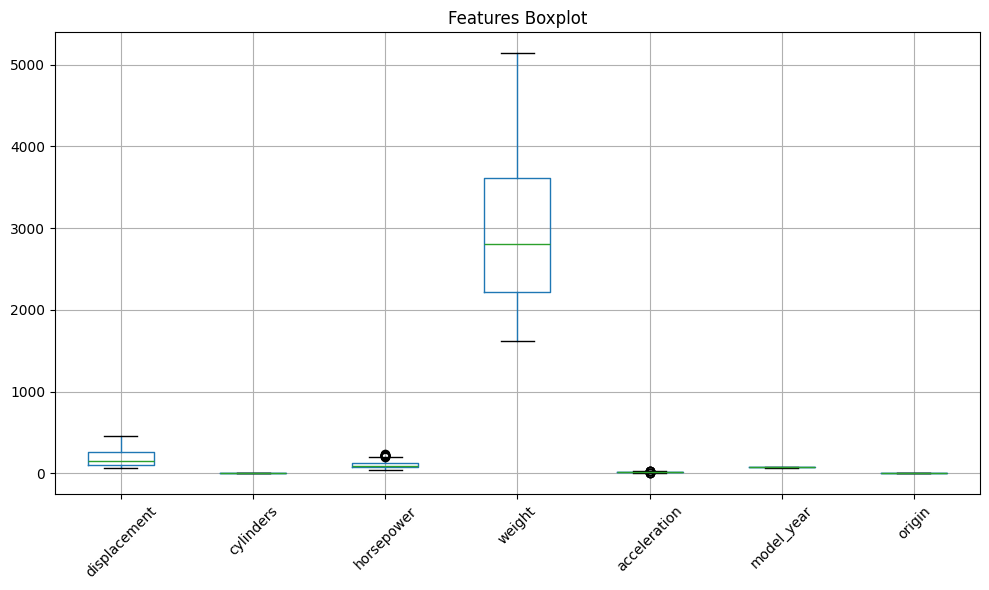

In [279]:
x_features_df.boxplot(figsize=(10,6))  # Adjust figsize as needed
plt.title('Features Boxplot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

According to the graph it looks like we have very few outliers so it is better to leave them as they would not represent a serious problem to the model.

### Checking the mpg distribution:

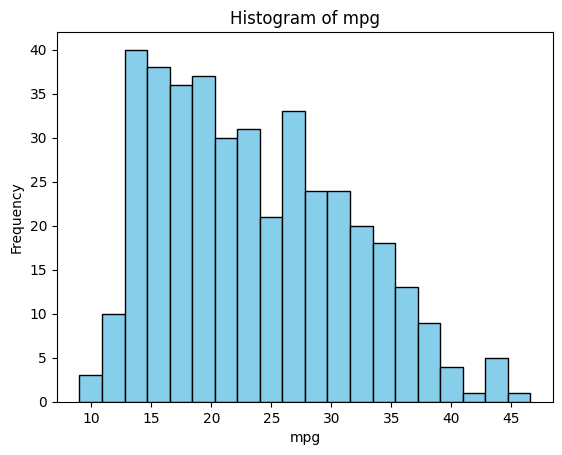

In [280]:
# Plot histogram with the target mpg
plt.hist(y_target_df, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('mpg')
plt.ylabel('Frequency')
plt.title('Histogram of mpg')
plt.show()

The histogram of the miles per gallon (mpg) variable does not perfectly fit a normal distribution. Here are some observations as to why:

- **Unimodal Distribution**: The histogram has a single peak, indicating that most cars fall within a certain mpg range.
- **Right Skewness**: The distribution is slightly skewed to the right, suggesting more cars with higher mpg values.
- **Not Perfectly Symmetrical**: A normal distribution would be perfectly symmetrical around the central peak, but this histogram shows some asymmetry.

In short, while the histogram exhibits some characteristics of normality, it is not a perfect fit for a normal distribution.

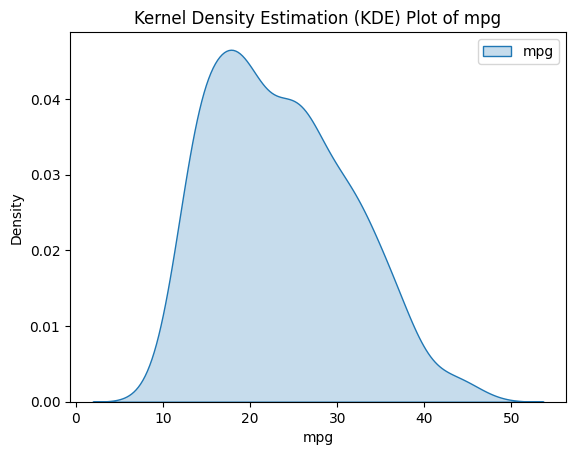

In [281]:
# Plot KDE plot
sns.kdeplot(y_target_df, color='skyblue', shade=True)
plt.xlabel('mpg')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot of mpg')
plt.show()

The <b>Kernel Density Estimation (KDE)</b> plot for the “mpg” variable provides a smoothed, continuous representation of the distribution. Here are the key takeaways from the plot:

- Peak around 20-30 mpg: The highest density of vehicles occurs in the 20-30 mpg range, suggesting that many cars fall within this fuel efficiency range.

- Gradual decrease: As mpg values move away from the peak, the density decreases, indicating fewer cars with extreme mpg values.

- No perfect symmetry: Unlike a normal distribution, the KDE plot is not perfectly symmetrical around the peak; it shows some skewness.

In summary, the KDE plot provides insights into the distribution of mpg values, emphasizing the most common range while capturing deviations from a perfectly normal distribution

### Visualizing distribution for each feature

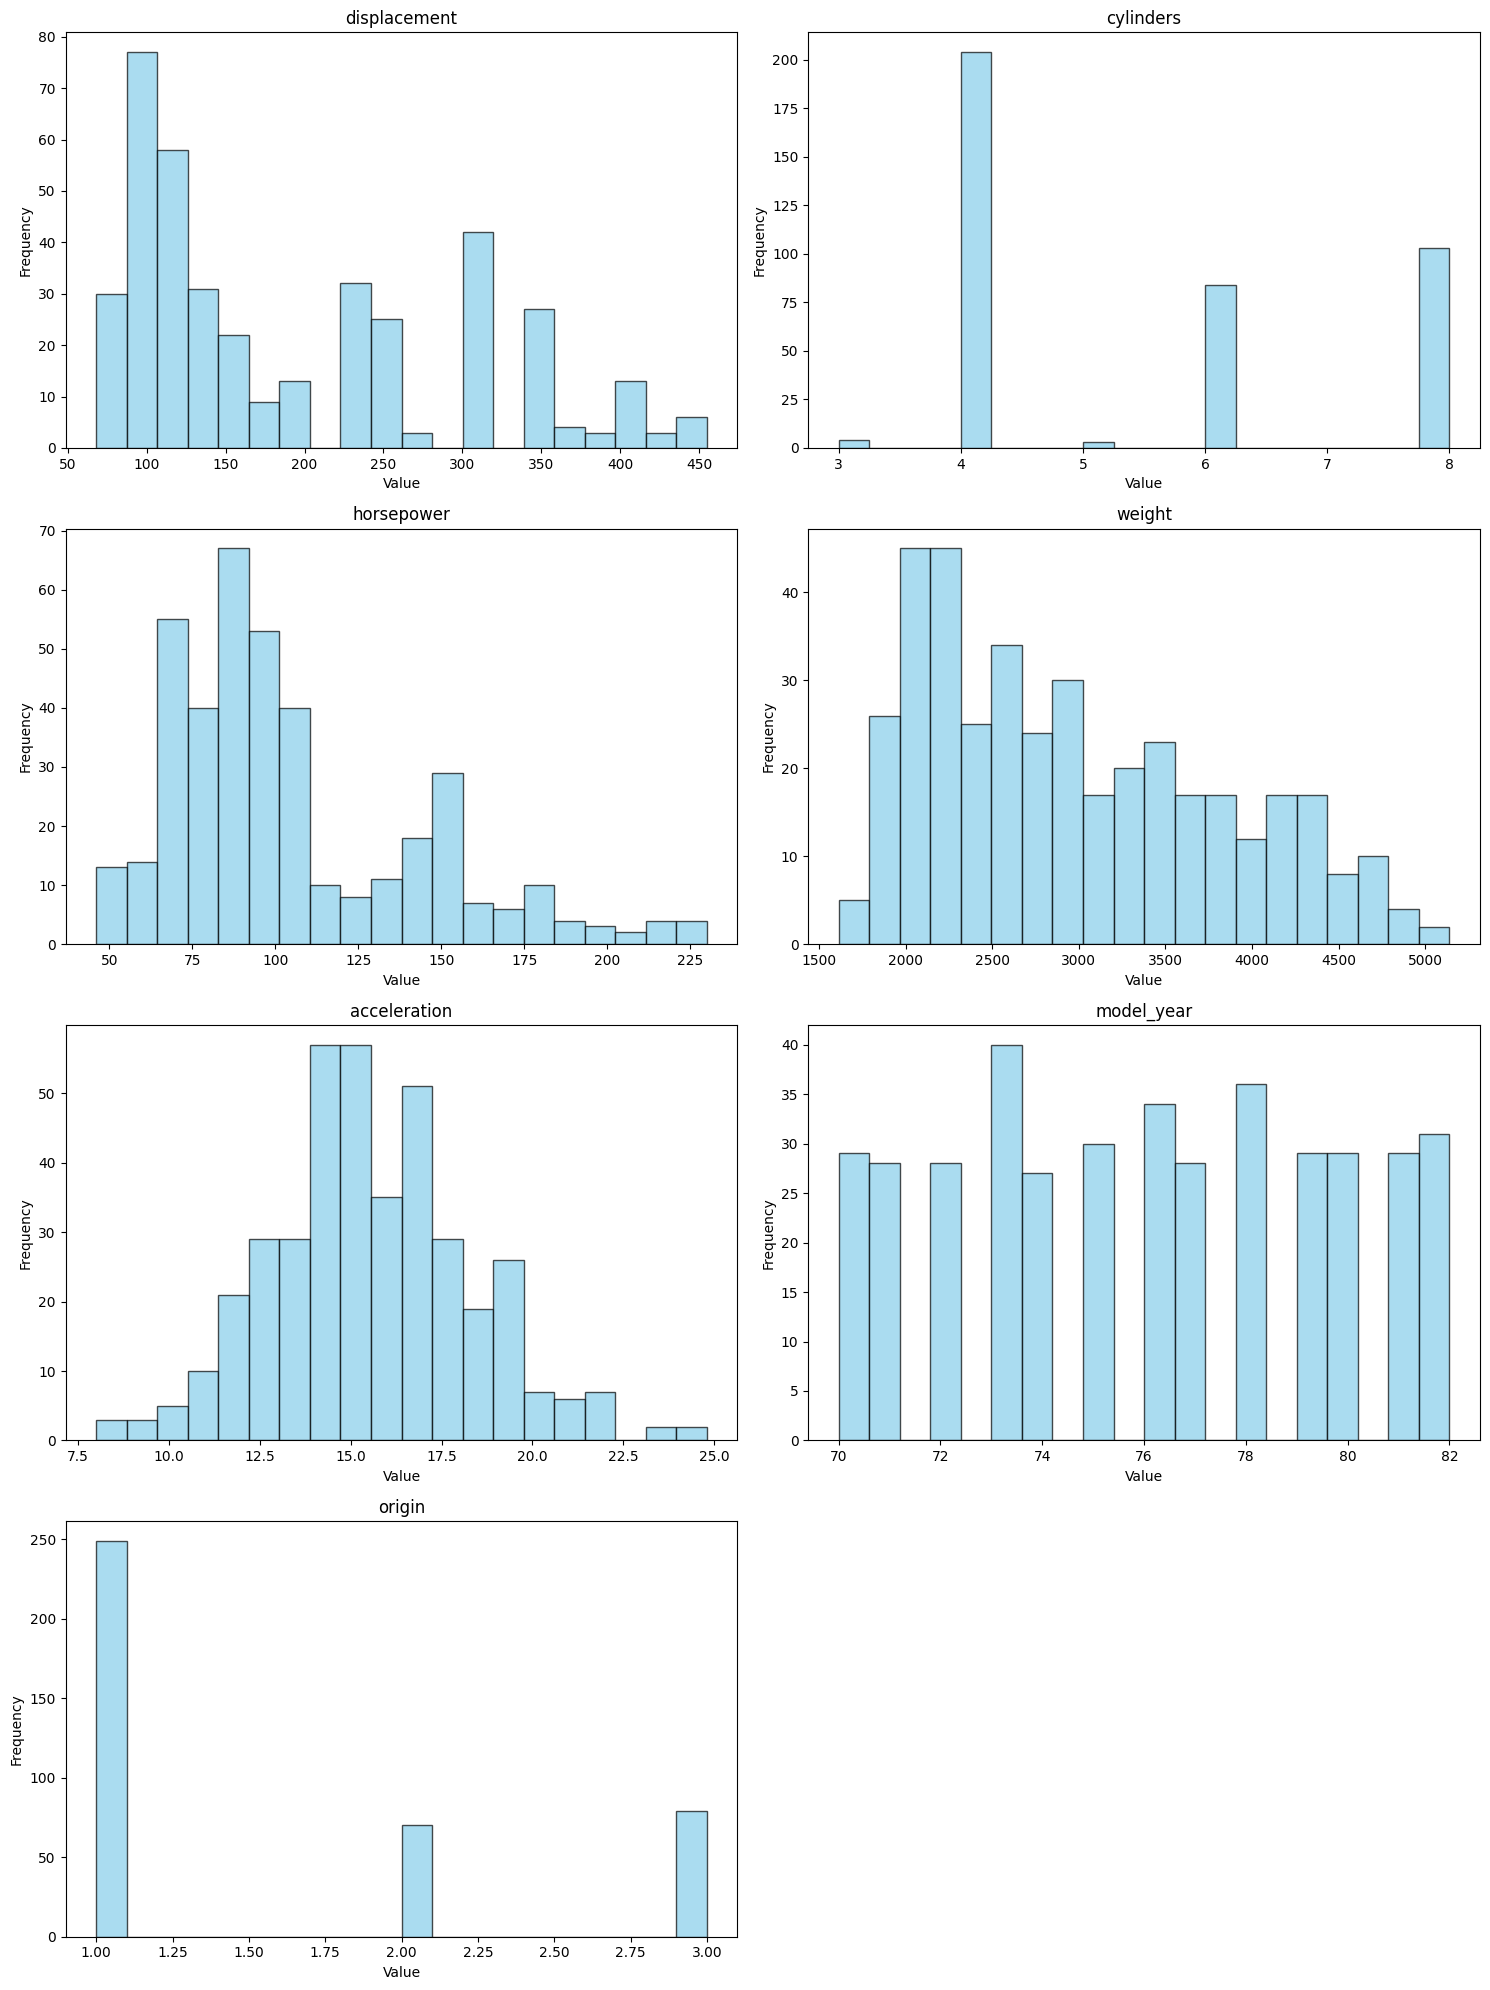

In [282]:
# Calculate the number of rows and columns for subplots based on the number of features
n_features = x_features_df.shape[1]
n_rows = (n_features + 1) // 2  # Round up to the nearest integer
n_cols = 2

# Define a larger figure size
figsize = (15, 5 * n_rows)

# Create subplots with the larger figure size
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)
axes = axes.ravel()

# Plot each feature
for idx, ax in enumerate(axes):
    if idx < n_features:
        feature = x_features_df.iloc[:, idx]  # Extract the specific feature
        ax.hist(feature, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        ax.set_title(x_features_df.columns[idx])
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
    else:
        ax.axis('off')  # Turn off extra subplots if there are fewer than 10 features

plt.tight_layout()
plt.show()

### Visuzalizing correlation

In [283]:
# Let's concatenate features and target along the columns axis (axis=1)
# only to check the correlation with mpg variable
auto_mpg_df = pd.concat([x_features_df, y_target_df], axis=1)

# checking the correlation among all the features with the target variable mpg
correlation_matrix = auto_mpg_df.corr()

# print the correlations
correlation_matrix

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
displacement,1.000000,0.950721,0.893646,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
cylinders,0.950721,1.000000,0.838939,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
horsepower,0.893646,0.838939,1.000000,0.860574,-0.684259,-0.411651,-0.453669,-0.771437
weight,0.932824,0.896017,0.860574,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.543684,-0.505419,-0.684259,-0.417457,1.000000,0.288137,0.205873,0.420289
model_year,-0.370164,-0.348746,-0.411651,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.609409,-0.562543,-0.453669,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.804203,-0.775396,-0.771437,-0.831741,0.420289,0.579267,0.563450,1.000000


1. <b>Displacement:</b> There is a strong negative correlation (-0.80) between displacement and mpg. As engine displacement (size) increases, fuel efficiency tends to decrease.

2. <b>Cylinders:</b> Similarly, the number of cylinders has a negative correlation (-0.78) with mpg. More cylinders often mean lower fuel efficiency.

3. <b>Horsepower:</b> Horsepower also negatively correlates (-0.77) with mpg. More powerful engines consume more fuel.

4. <b>Weight:</b> Weight has a strong negative correlation (-0.83) with mpg. Heavier vehicles tend to be less fuel-efficient.

5. <b>Acceleration:</b> Acceleration shows a weak positive correlation (0.42) with mpg. Faster acceleration may slightly reduce fuel efficiency.

6. <b>Model Year:</b> There is a moderate positive correlation (0.58) between model year and mpg. Newer models tend to be more fuel-efficient.

7. <b>Origin:</b> The origin of the vehicle (coded as 1, 2, or 3) has varying correlations with mpg.

<b>Important Note:</b> That correlation does not imply causation, but these insights can guide further analysis or modeling efforts.

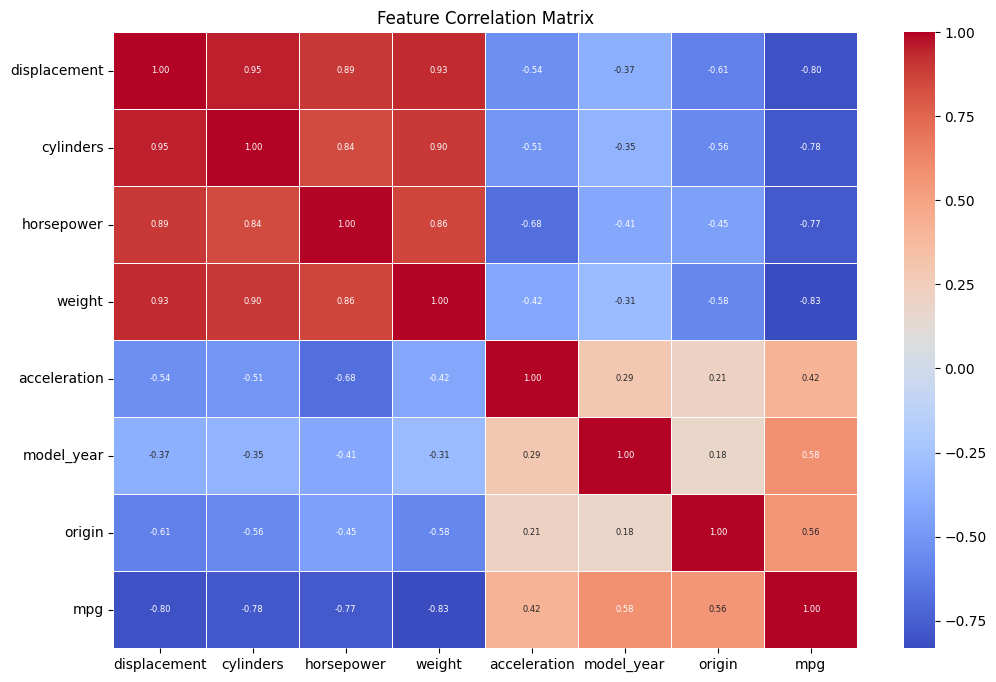

In [284]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={'size': 6})
plt.title('Feature Correlation Matrix')
plt.show()

### Correlation conclution:


Based on the correlation results, the following explanatory continue variables are relevant for predicting <b>fuel efficiency (mpg):</b>

1. <b>Weight:</b> Weight has a strong negative correlation with mpg (-0.83). Heavier vehicles tend to have lower fuel efficiency.

2. <b>Displacement:</b> Displacement also has a strong negative correlation with mpg (-0.80). Larger engine sizes typically lead to lower mpg.

3. <b>Cylinders:</b> The number of cylinders negatively correlates with mpg (-0.78). More cylinders often mean lower fuel efficiency.

4. <b>Horsepower:</b> Horsepower negatively correlates with mpg (-0.77). More powerful engines consume more fuel.

5. <b>Model Year:</b> There is a moderate positive correlation between model year and mpg (0.58). Newer models tend to be more fuel-efficient. </b>

- The <b>origen</b> and the <b>accelelation</b> are not as relevant according to the correlation coefficient.

<b>Important note:</b> these correlations provide insights, but other factors (not captured in this analysis) may also influence fuel efficiency.

## 4. <b>Data Preparation & Modeling</b>

In [288]:
# Note: 
# -----
# Scaling features can sometimes improve model performance, particularly for algorithms 
# that are sensitive to feature scales. However, in the case of OLS regression, 
# the impact of feature scaling may not be as pronounced as with other algorithms 
# like SVMs or neural networks. I will not use scaling in this case.

# Select only the 5 best correlated variables to train and split the data
selected_features = ['weight', 'displacement', 'cylinders', 'horsepower', 'model_year']
x_selected_df = x_features_df[selected_features]

# Prepare the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_selected_df, y_target_df, test_size=0.2, random_state=42)

# Checking the training data
print(x_train.head())

     weight  displacement  cylinders  horsepower  model_year
3      3433         304.0          8       150.0          70
18     2130          97.0          4        88.0          70
376    2025          91.0          4        68.0          82
248    1800          91.0          4        60.0          78
177    2694         115.0          4        95.0          75


## Simple Linear Regression
Apply simple lineal regression on each descriptive continue feature using <b>Ordinary Least Squares (OLS) regression</b></br>
<p><b>OLS:</b> provides more statistical information compared to the <b>LinearRegression</b> method typically used with scikit-learn. OLS regression not only estimates the coefficients of the linear regression model but also provides valuable statistical insights such as:

1. <b>Coefficient estimates:</b> OLS provides estimates of the coefficients along with their standard errors, t-statistics, and p-values. These statistics help assess the significance of each feature in predicting the target variable.

2. <b>R-squared:</b> OLS calculates the R-squared value, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating better model fit.

3. <b>Adjusted R-squared:</b> This is a modified version of R-squared that penalizes the addition of unnecessary predictors in the model. It adjusts for the number of predictors and provides a more accurate measure of model fit for multiple regression models.

4. <b>F-statistic:</b> OLS computes the F-statistic, which tests the overall significance of the regression model. It assesses whether at least one independent variable significantly predicts the dependent variable.

5. <b>Residual diagnostics:</b> OLS residuals (the differences between observed and predicted values) can be analyzed for normality, homoscedasticity (constant variance), and independence. These diagnostics help validate the assumptions of the linear regression model.

Overall, OLS regression offers a comprehensive set of statistical metrics that provide deeper insights into the relationship between the independent and dependent variables, making it a valuable tool for regression analysis</p>

Summary Statistics for weight:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     685.5
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           3.80e-81
Time:                        22:56:54   Log-Likelihood:                -925.80
No. Observations:                 318   AIC:                             1856.
Df Residuals:                     316   BIC:                             1863.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.7821

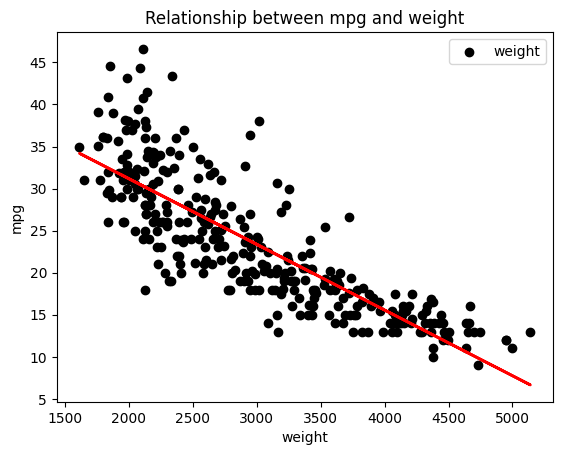

Summary Statistics for displacement:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     567.8
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           1.48e-72
Time:                        22:56:54   Log-Likelihood:                -945.67
No. Observations:                 318   AIC:                             1895.
Df Residuals:                     316   BIC:                             1903.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const      

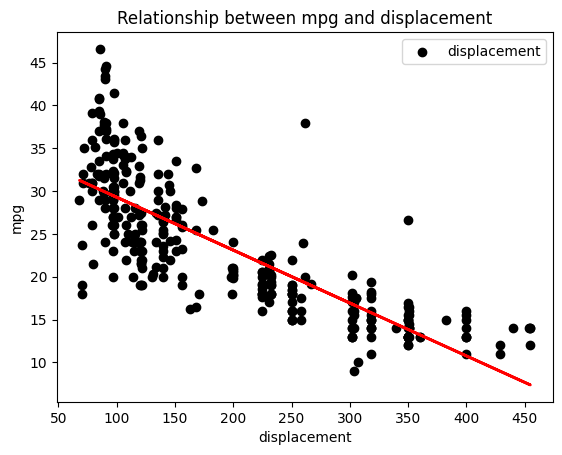

Summary Statistics for cylinders:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     461.6
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           9.50e-64
Time:                        22:56:55   Log-Likelihood:                -966.04
No. Observations:                 318   AIC:                             1936.
Df Residuals:                     316   BIC:                             1944.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.3

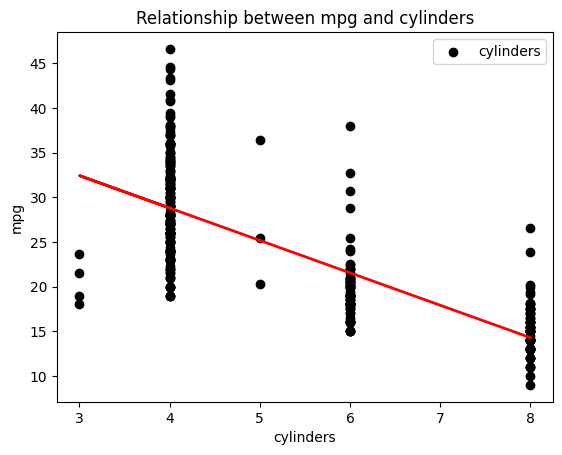

Summary Statistics for horsepower:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     442.2
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           5.12e-62
Time:                        22:56:55   Log-Likelihood:                -970.05
No. Observations:                 318   AIC:                             1944.
Df Residuals:                     316   BIC:                             1952.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.

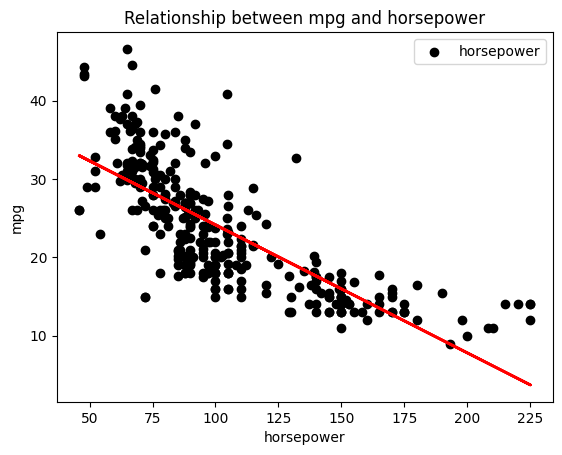

Summary Statistics for model_year:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     165.9
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           8.39e-31
Time:                        22:56:55   Log-Likelihood:                -1042.1
No. Observations:                 318   AIC:                             2088.
Df Residuals:                     316   BIC:                             2096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -74.

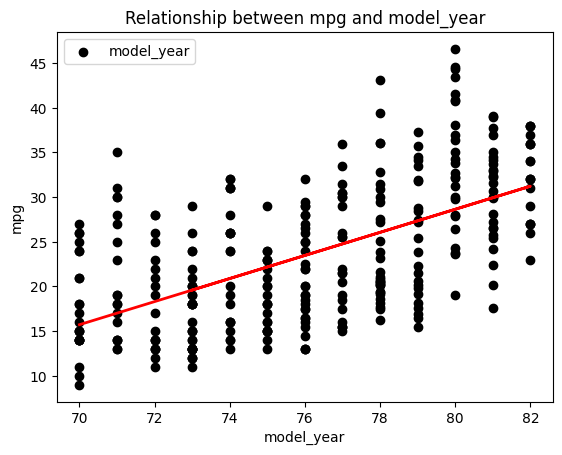

In [289]:
# Select the best 5 correlated variables
descriptive_features = ['weight', 'displacement', 'cylinders', 'horsepower', 'model_year']

# Setting the response variable (y_train)
response_variable = 'mpg'

# Function to apply simple linear regression each descriptive continue feature
def apply_simple_regression(x_feature, y_target):
    # Get the name of the feature
    x_name = x_feature.name
    
    # Reset indices to ensure alignment
    x_feature = x_feature.reset_index(drop=True)
    y_target = y_target.reset_index(drop=True)
    
    # Fit the simple regression model
    model = sm.OLS(y_target, sm.add_constant(x_feature))
    result = model.fit()

    # Print the summary statistics of the model with feature name
    print(f"Summary Statistics for {x_name}:")
    print(result.summary())
    print("-----------------------")
    
    # Visualize the relationship between x and y
    plt.scatter(x_feature, y_target, marker='o', color='black')
    plt.plot(x_feature, result.fittedvalues, color='red', linewidth=2)
    plt.xlabel(x_name)
    plt.ylabel(y_target.name)
    plt.title(f"Relationship between {y_target.name} and {x_name}")
    plt.legend({x_name})
    plt.show()

# Apply simple regression for each selected feature
for feature in descriptive_features:
    apply_simple_regression(x_train[feature], y_train[response_variable])

## Explain the OLS results only for the variable weight with mpg, for the rest of the variables we have to check each value and interpret them in the same way as weight.

1. <b>R-squared Value:</b> The R-squared value is 0.684, which indicates that approximately 68.4% of the variance in 'mpg' can be explained by the 'weight' of the vehicle using this model. This suggests that 'weight' is reasonably effective in predicting 'mpg', as it explains a substantial portion of the variability in the target variable.

2. <b>Significance of the Coefficient:</b> The coefficient for 'weight' is statistically significant with a very low p-value (P>|t| = 0.000), indicating that the relationship between 'weight' and 'mpg' is unlikely to be due to random chance.

3. <b>Coefficient Estimate:</b> The negative coefficient (-0.0078) for 'weight' suggests that as the weight of the vehicle increases, the miles per gallon decreases. This aligns with common intuition, as heavier vehicles typically consume more fuel.

4. <b>Adjusted R-squared:</b> The adjusted R-squared value (0.683) is close to the R-squared value, indicating that the inclusion of 'weight' as a predictor in the model does not substantially reduce its explanatory power.

5. <b>F-statistic:</b> The F-statistic is high (685.5), and its associated p-value is close to zero, indicating that the overall model is statistically significant.

Overall, based on these results, it appears that 'weight' is a good descriptive variable for predicting 'mpg' in this model. However, it's essential to consider the context of the analysis, the assumptions of the model, and potential interactions with other variables before making conclusive decisions.

--> Useful references to read: 
- https://medium.com/analytics-vidhya/how-to-interpret-result-from-linear-regression-3f7ae7679ef9
- https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/

## Multiple Lineal Regression

In [293]:
# Concatenate x_train_df and y_train along columns
# because the dataframes are separated and we avoid the error 
# that the indexes are not adjusted.
# Error: The indices for endog and exog are not aligned Output is truncated
df_train = pd.concat([x_train, y_train], axis=1)

# Define the formula for the multiple linear regression model
# ~ this symbol indicate a separation of the mpg var from the rest
# mpg in this case is the y-hat of the formula, the target.
formula = "mpg ~ weight + displacement + cylinders + horsepower + model_year"

# Fit the multiple linear regression model using OLS
model_lin = sm.OLS.from_formula(formula, data=df_train)

result_lin = model_lin.fit()

# Print the summary statistics of the model
print(result_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     255.3
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          5.85e-108
Time:                        23:22:15   Log-Likelihood:                -850.44
No. Observations:                 318   AIC:                             1713.
Df Residuals:                     312   BIC:                             1735.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.0081      5.066     -3.357   

## OLS result for the multiple lineal regresion

<p> For which predictors can we reject the null hypothesis H0 : the effect of d[j] = 0?</p>

<b>Note:</b></br>

<p>To specify whether we reject or not the null hypothesis for each predictor, we need to examine the p-values associated with each coefficient in the regression output. If the p-value is less than the chosen significance level (commonly 𝛼=0.05 α=0.05), we reject the null hypothesis and conclude that the predictor has a statistically significant effect on the dependent variable. Otherwise, if the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis.</p>

1. <b>Intercept:</b> The p-value associated with the intercept is less than 0.05 (P>|t| = 0.001). Therefore, we can reject the null hypothesis for the intercept, indicating that the intercept term is statistically significant in predicting the dependent variable (mpg).

2. <b>Weight:</b> The p-value associated with the coefficient for weight is less than 0.05 (P>|t| = 0.000). Hence, we can reject the null hypothesis for weight, suggesting that weight has a statistically significant effect on mpg.

3. <b>Displacement:</b> The p-value associated with the coefficient for displacement is greater than 0.05 (P>|t| = 0.914). Thus, we fail to reject the null hypothesis for displacement, implying that displacement does not have a statistically significant effect on mpg.

4. <b>Cylinders:</b> The p-value associated with the coefficient for cylinders is greater than 0.05 (P>|t| = 0.886). Consequently, we fail to reject the null hypothesis for cylinders, indicating that cylinders do not have a statistically significant effect on mpg.

5. <b>Horsepower:</b> The p-value associated with the coefficient for horsepower is greater than 0.05 (P>|t| = 0.740). Therefore, we fail to reject the null hypothesis for horsepower, suggesting that horsepower does not have a statistically significant effect on mpg.

6. <b>Model Year:</b> The p-value associated with the coefficient for model year is less than 0.05 (P>|t| = 0.000). Hence, we can reject the null hypothesis for model year, indicating that model year has a statistically significant effect on mpg.

In summary, we can reject the null hypothesis for intercept, weight, and model year, while we fail to reject the null hypothesis for displacement, cylinders, and horsepower.

## Compare regression coefficients

In [297]:
# Set the descriptive features and response variable
X = x_train[['cylinders', 'displacement', 'horsepower', 'weight', 'model_year']]
y = y_train['mpg']

# Fit simple linear regression models
fit_cylinders = sm.OLS(y, sm.add_constant(X['cylinders'])).fit()
fit_displacement = sm.OLS(y, sm.add_constant(X['displacement'])).fit()
fit_horsepower = sm.OLS(y, sm.add_constant(X['horsepower'])).fit()
fit_weight = sm.OLS(y, sm.add_constant(X['weight'])).fit()
fit_year = sm.OLS(y, sm.add_constant(X['model_year'])).fit()


# Coefficients from simple linear regression models
simple_reg = [
    fit_cylinders.params[1],
    fit_displacement.params[1],
    fit_horsepower.params[1],
    fit_weight.params[1],
    fit_year.params[1]
]

# Print the coefficients
print("Coefficients from simple linear regression models:")
for feature, coef in zip(X.columns, simple_reg):
    print(f"{feature}: {coef}")

Coefficients from simple linear regression models:
cylinders: -3.6263332785917255
displacement: -0.06172520500109302
horsepower: -0.16340256231158887
weight: -0.00780524235159488
model_year: 1.2914184723931863


In [298]:
# Fit multiple regression model
model_all = sm.OLS(y, sm.add_constant(X))
fit_all = model_all.fit()

# Coefficients from multiple regression model
mult_reg = fit_all.params[1:]

# Print the coefficients
print("Coefficients from multiple regression model:")
print(mult_reg)

Coefficients from multiple regression model:
cylinders       0.055773
displacement    0.000903
horsepower     -0.003976
weight         -0.006788
model_year      0.797657
dtype: float64


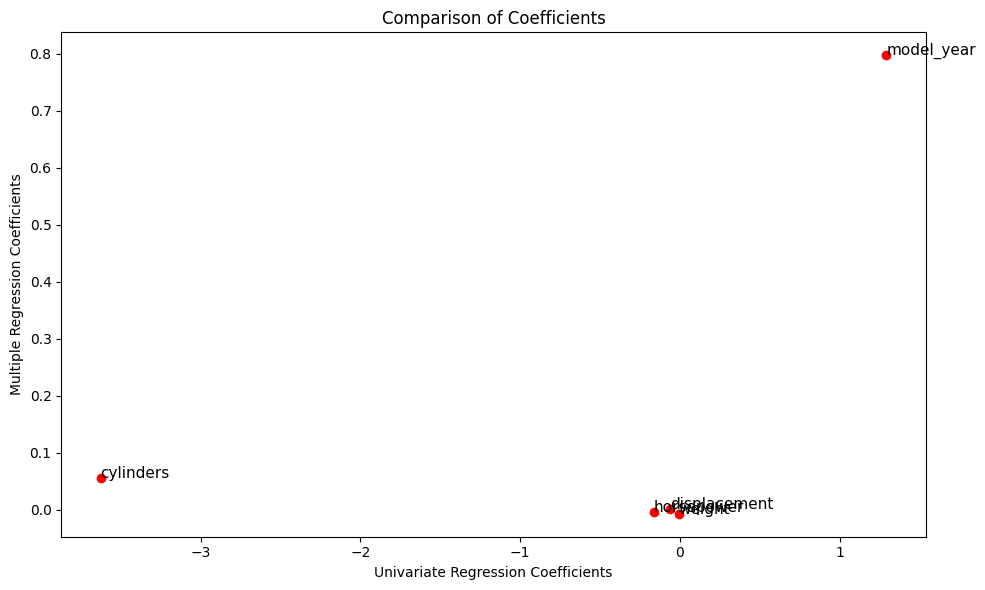

In [299]:
# plotting the simple linear regression models vs multiple regression model

common_predictors = X.columns.intersection(fit_all.model.exog_names[1:])
plt.figure(figsize=(10, 6))
plt.scatter(simple_reg, mult_reg.loc[common_predictors], color='red')
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.title('Comparison of Coefficients')

# Add labels to the plot
for i, predictor in enumerate(common_predictors):
    x = simple_reg[i]
    y = mult_reg.loc[predictor]
    label = predictor
    plt.text(x, y, label, fontsize=11)
plt.tight_layout()
plt.show()

#### Observations :

<b>Model Year (model_year):</b> The point labeled ‘model_year’ lies close to the x-axis at a value slightly less than 1 on the Univariate Regression Coefficients axis. This indicates a positive relationship in both univariate and multiple regression models, although it has a lower coefficient in the multiple regression model.

<b>Cylinders:</b> The point labeled ‘cylinders’ is located near the value of -2 on the Univariate Regression Coefficients axis and around 0.6 on the Multiple Regression Coefficients axis. This suggests a negative relationship in univariate regression but a positive one when other variables are controlled for in multiple regression.

<b>Displacement:</b> The point labeled ‘displacement’ has similar coordinates as ‘cylinders’, indicating similar behavior across both types of regression models.
<p>These observations provide insights into how individual variables behave differently when analyzed alone versus when analyzed together with other variables.</p>

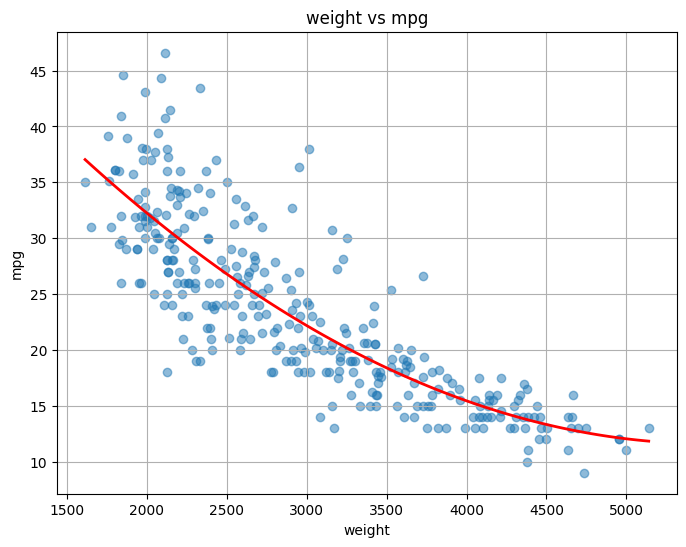

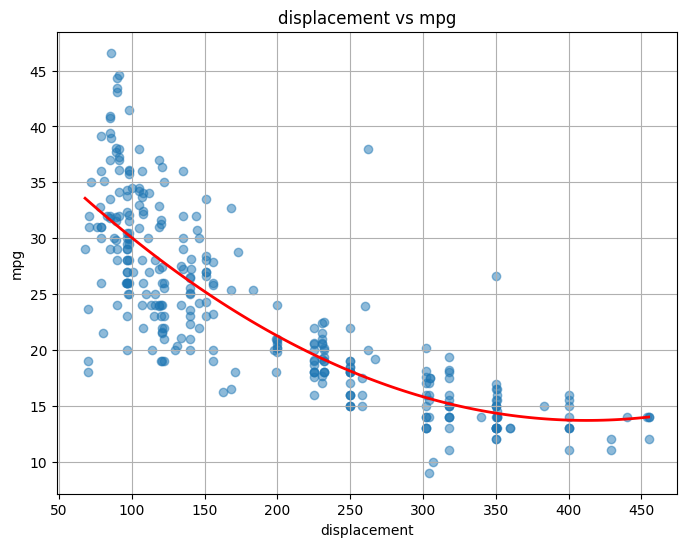

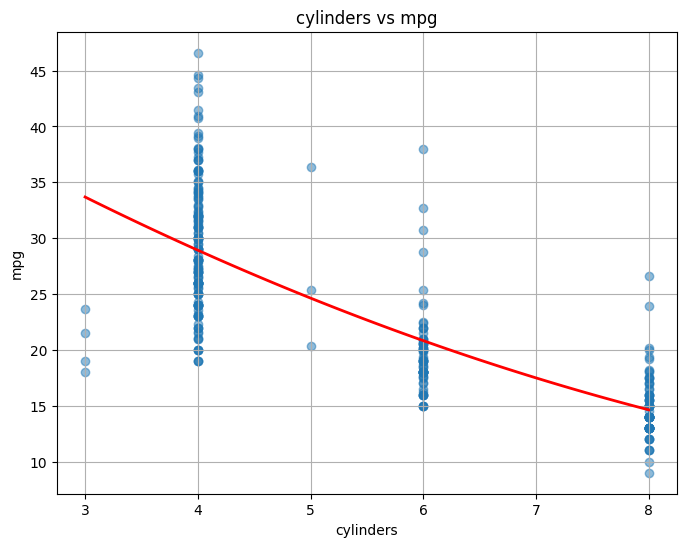

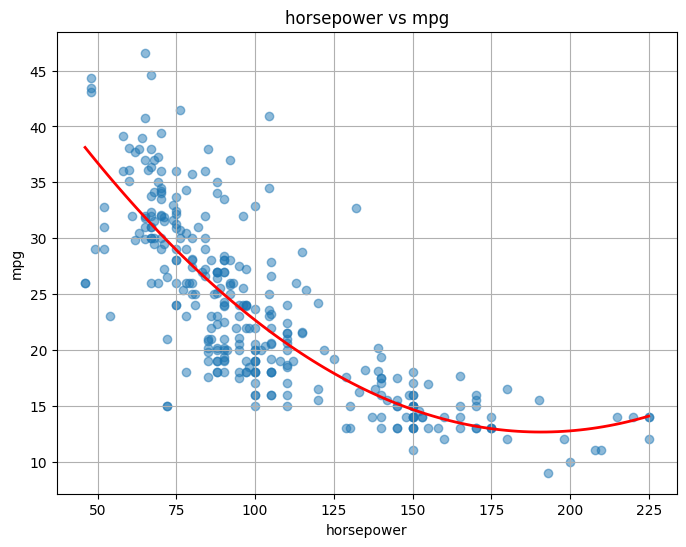

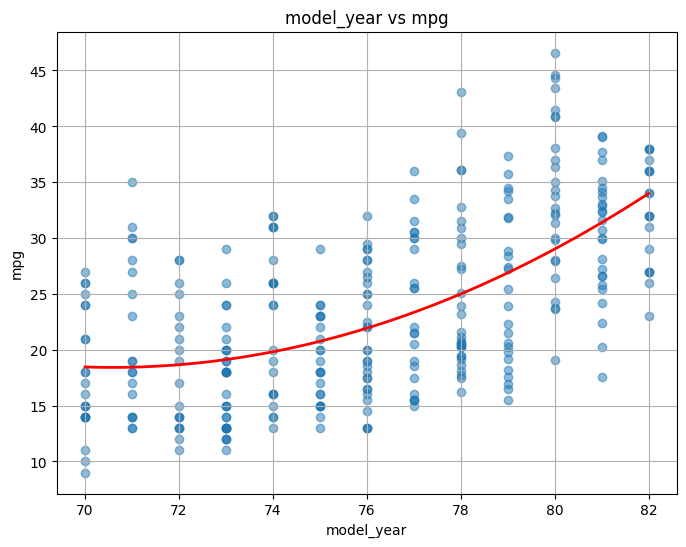

In [309]:
# Function to plot each descriptive feature against the target variable
def plot_feature_vs_target(df, target_feature, poly_degree):
    predictors = df.columns[df.columns != target_feature]
    for predictor in predictors:
        # Fit polynomial regression
        coeffs = np.polyfit(df[predictor], df[target_feature], poly_degree)
        poly = np.poly1d(coeffs)
        
        # Plot scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(df[predictor], df[target_feature], alpha=0.5)
        plt.title(f"{predictor} vs {target_feature}")
        plt.xlabel(predictor)
        plt.ylabel(target_feature)
        
        # Plot fitted polynomial regression line
        x_range = np.linspace(df[predictor].min(), df[predictor].max(), 100)
        plt.plot(x_range, poly(x_range), color='red', linewidth=2)
        
        plt.grid(True)
        plt.show()

# Plot each descriptive feature against the target variable
plot_feature_vs_target(df_train, 'mpg', 2)

### Is there evidence of non-linear association between any of the predictors and the response? 

<p>We can clearly observe that the polynomial line is a better fit to the data points because shows a curve pattern. This suggests using a polynomial regression model instead of the linear one to perform better in making predictions.</p>